# Wrangle WeRateDogs Twitter Data

# Gathering

In [1]:
# import the needed libraries and packages
import pandas as pd
import numpy as np
import requests
import glob
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

### Source: File on Hand  (twitter-archive-enhanced)

In [2]:
# Read csv file as pandas DataFrame
df_tarchive = pd.read_csv('twitter-archive-enhanced.csv')
df_tarchive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

### Source: Downloading Files from the Internet (image_predictions)

In [3]:
# download tsv file from a url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
# Read the tsv file downloaded before as a pandas DataFrame
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
df_imagep = pd.read_csv('image-predictions.tsv', sep = '\t')

# check the dataframe
df_imagep.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

### Source: Twitter API (Application Programming Interface)

In [5]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_tarchive.tweet_id.values
len(tweet_ids)

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        #print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            #print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            #print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
#print(end - start)
#print(fails_dict)

Parsing JSON file to get specific values, read on stackoverflow:
https://stackoverflow.com/questions/30898233/parsing-json-files-in-python-to-get-specific-values

In [6]:
# List of dictionaries to build file by file and later convert to a DataFrame
df_list = []
with open('tweet-json.txt') as file:
    for line in file:
        data = json.loads(line)
        tweet_id = data['id']
        favorite_count = data['favorite_count']
        retweet_count = data['retweet_count']
        # Append to list of dictionaries
        df_list.append({'tweet_id': tweet_id,
                        'favorite_count': favorite_count,
                        'retweet_count': retweet_count})
df_json = pd.DataFrame(df_list, columns = ['tweet_id', 'favorite_count', 'retweet_count'])

#check the dataframe
df_json.head()

tweet_id  favorite_count  retweet_count
0  892420643555336193           39467           8853
1  892177421306343426           33819           6514
2  891815181378084864           25461           4328
3  891689557279858688           42908           8964
4  891327558926688256           41048           9774

# Assessing

#### Assessing the first DataFrame df_tarchive

In [7]:
# look at the dataframe
df_tarchive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [8]:
# use info method to assess the dataframe
df_tarchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:

# check for duplicated observations
df_tarchive.duplicated().sum()

0

In [10]:
# check values for name column
df_tarchive.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Cooper           11
Lucy             11
Penny            10
Tucker           10
Lola             10
Winston           9
Bo                9
Sadie             8
the               8
Daisy             7
Toby              7
Buddy             7
an                7
Bailey            7
Leo               6
Koda              6
Milo              6
Rusty             6
Jax               6
Scout             6
Oscar             6
Dave              6
Bella             6
Stanley           6
Jack              6
Larry             5
               ... 
Chloe             1
officially        1
Snicku            1
Kevon             1
Adele             1
Jarod             1
Venti             1
DayZ              1
Snickers          1
Sobe              1
Nico              1
Poppy             1
Karl              1
Pubert            1
Rodney            1
Angel             1
Horace            1
Gin               1
Noah              1


name column contains invalid entries like a, the, an.
All start with lowercase letter, so let's check all names start with lowercase letter.

In [11]:
# check lowercase names in name column
dname = df_tarchive[df_tarchive.name.str.islower()]
dname.name.value_counts()

a               55
the              8
an               7
very             5
quite            4
one              4
just             4
not              2
actually         2
getting          2
mad              2
all              1
his              1
this             1
my               1
unacceptable     1
old              1
life             1
by               1
such             1
incredibly       1
space            1
infuriating      1
officially       1
light            1
Name: name, dtype: int64

There is one name in the name.value_counts shows as O,
We will its row and read the tweet to understand what does O mean.

In [12]:
# checking the row that contains O as a name in name column
df_tarchive[df_tarchive.name == 'O']

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
775  776201521193218049                    NaN                  NaN   

                     timestamp  \
775  2016-09-14 23:30:38 +0000   

                                                source  \
775  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
775  This is O'Malley. That is how he sleeps. Doesn...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
775                       NaN                        NaN   

                                         expanded_urls  rating_numerator  \
775  https://twitter.com/dog_rates/status/776201521...                10   

     rating_denominator name doggo floofer pupper puppo  
775                  10    O  None    None   None  None

In [13]:
# check rating_denominator column
df_tarchive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [14]:
# find how many rows with rating_denominator not equal to 10
(df_tarchive.rating_denominator != 10).value_counts()

False    2333
True       23
Name: rating_denominator, dtype: int64

The rating_denominator should be 10, but there are some observations have 
greater or smaller rating_denominator than 10.

In [15]:
# find all observations with rating_denominator greater or smaller than 10
df_tarchive[df_tarchive.rating_denominator != 10]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
433   820690176645140481                    NaN                  NaN   
516   810984652412424192                    NaN                  NaN   
784   775096608509886464                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
1068  740373189193256964                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1165  722974582966214656                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1662  682962037429899265                    NaN                  NaN   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   

                      timestamp  \
313   2017-02-24 21:54:03 +0000   
342   2017-02-16 04:45:50 +0000   
433   2017-01-15 17:52:40 +0000   
516   2016-12-19 23:06:23 +0000   
784   2016-09-11 22:20:06 +0000   
902   2016-07-28 01:00:57 +0000   
1068  2016-06-08 02:41:38 +0000   
1120  2016-05-13 16:15:54 +0000   
1165  2016-04-21 02:25:47 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1598  2016-01-10 04:04:10 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1662  2016-01-01 16:30:13 +0000   
1663  2016-01-01 06:22:03 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   
2335  2015-11-16 16:11:11 +0000   

                                                 source  \
313   <a href="http://twitter.com/download/iphone" r...   
342   <a href="http://twitter.com/download/iphone" r...   
433   <a href="http://twitter.com/download/iphone" r...   
516   <a href="http://twitter.com/download/iphone" r...   
784   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
1068  <a href="http://twitter.com/download/iphone" r...   
1120  <a href="http://twitter.com/download/iphone" r...   
1165  <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1433  <a href="http://twitter.com/download/iphone" r...   
1598  <a href="http://twitter.com/download/iphone" r...   
1634  <a href="http://twitter.com/download/iphone" r...   
1635  <a href="http://twitter.com/download/iphone" r...   
1662  <a href="http://twitter.com/download/iphone" r...   
1663  <a href="http://twitter.com/download/iphone" r...   
1779  <a href="http://twitter.com/download/iphone" r...   
1843  <a href="http://twitter.com/download/iphone" r...   
2335  <a href="http://twitter.com/download/iphone" r...   

                             

I will be replacing all these observations rating denominators with the median of the same column

In [16]:
# check rating_numerator column
df_tarchive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [17]:
# check the values of rating_numerator column
df_tarchive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
# check all observations where rating_numerator is greater than 25
(df_tarchive.rating_numerator > 25).value_counts()

False    2333
True       23
Name: rating_numerator, dtype: int64

We will replace these observations' rating numerator with the median

#### Assessing the second DataFrame df_imagep

In [19]:
# look at the dataframe
df_imagep

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
...                  ...                                                ...   
2045  886366144734445568    https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2047  886736880519319552    https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg   
2048  886983233522544640    https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg   
2049  887101392804085760    https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg   
2050  887343217045368832  https://pbs.twimg.com/ext_tw_video_thumb/88734...   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2053  887705289381826560    https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg   
2054  888078434458587136    https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg   
2059  889278841981685760  https://pbs.twimg.com/ext_tw_video_thumb/88927...   
2060  889531135344209921    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
2061  889638837579907072    https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg   
2062  889665388333682689    https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg   
2063  889880896479866881    https://pbs.twimg.com/media/DFl99B1WsA

In [20]:
# use info method to assess the dataframe
df_imagep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
# check the value_counts for the three predections boolean values 
print(df_imagep.p1_dog.value_counts())
print(df_imagep.p2_dog.value_counts())
print(df_imagep.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


#### Assessing the third DataFrame df_json

In [22]:
# look at the dataframe
df_json

tweet_id  favorite_count  retweet_count
0     892420643555336193           39467           8853
1     892177421306343426           33819           6514
2     891815181378084864           25461           4328
3     891689557279858688           42908           8964
4     891327558926688256           41048           9774
5     891087950875897856           20562           3261
6     890971913173991426           12041           2158
7     890729181411237888           56848          16716
8     890609185150312448           28226           4429
9     890240255349198849           32467           7711
10    890006608113172480           31166           7624
11    889880896479866881           28268           5156
12    889665388333682689           38818           8538
13    889638837579907072           27672           4735
14    889531135344209921           15359           2321
15    889278841981685760           25652           5637
16    888917238123831296           29611           4709
17    888804989199671297           26080           4559
18    888554962724278272           20290           3732
19    888078434458587136           22201           3653
20    887705289381826560           30779           5609
21    887517139158093824           46959          12082
22    887473957103951883           69871          18781
23    887343217045368832           34222          10737
24    887101392804085760           31061           6167
25    886983233522544640           35859           8084
26    886736880519319552           12306           3443
27    886680336477933568           22798           4610
28    886366144734445568           21524           3316
29    886267009285017600             117              4
...                  ...             ...            ...
2324  666411507551481857             459            339
2325  666407126856765440             113             44
2326  666396247373291520             172             92
2327  666373753744588802             194            100
2328  666362758909284353             804            595
2329  666353288456101888             229             77
2330  666345417576210432             307            146
2331  666337882303524864             204             96
2332  666293911632134144             522            368
2333  666287406224695296             152             71
2334  666273097616637952             184             82
2335  666268910803644416             108             37
2336  666104133288665088           14765           6871
2337  666102155909144576              81             16
2338  666099513787052032             164             73
2339  666094000022159362             169             79
2340  666082916733198337             121             47
2341  666073100786774016             335            174
2342  666071193221509120             154             67
2343  666063827256086533             496            232
2344  666058600524156928             115             61
2345  666057090499244032             304            146
2346  666055525042405380             448            261
2347  666051853826850816            1253            879
2348  666050758794694657             136             60
2349  666049248165822465             111             41
2350  666044226329800704             311            147
2351  666033412701032449             128             47
2352  666029285002620928             132             48
2353  666020888022790149            2535            532

[2354 rows x 3 columns]

In [23]:
# use info method to assess the dataframe
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [24]:
# find if there any duplicates
df_json.duplicated().sum()

0

In [25]:
# check the description of the dataframe columns
df_json.describe()

tweet_id  favorite_count  retweet_count
count  2.354000e+03     2354.000000    2354.000000
mean   7.426978e+17     8080.968564    3164.797366
std    6.852812e+16    11814.771334    5284.770364
min    6.660209e+17        0.000000       0.000000
25%    6.783975e+17     1415.000000     624.500000
50%    7.194596e+17     3603.500000    1473.500000
75%    7.993058e+17    10122.250000    3652.000000
max    8.924206e+17   132810.000000   79515.000000

In [26]:
# check if there is any duplicate column rather than twee_id in the three columns
all_columns = pd.Series(list(df_tarchive) + list(df_imagep) + list(df_json))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

### Assessing summary:
##### Quality issues for df_tarchive DataFrame::
* Rating denominator contains values larger and smaller than 10 (it should be 10).
* Wrong types for these columns : 
    - timestamp (object, should be datetime)
    - retweeted_status_timestamp (object, should be datetime)
* 181 rows are not original tweet they are retweets.
* 78 rows are not original tweet they are replys.
* 'name' column contains None instead of NaN
* 'name' column contains wrong values as names like a, an, the.
* Name 'O' instead of name "O'Malley"
* Other columns contain None instead of NaN (doggo, floofer, pupper, puppo).
* Columns that not related to original tweets:
    - in_reply_to_status_id
    - in_reply_to_user_id
    - retweeted_status_id
    - retweeted_status_user_id
    - retweeted_status_timestamp

##### Quality issues for df_imagep DataFrame:
* p1, p2, p3 columns entries are not following the same format; some are lowercase and some are uppercase.

##### Tidiness issues:
* 4 columns for dogs stages instead of one:
    - doggo
    - floofer
    - pupper
    - puppo
* Combine 3 datasets into one dataset.

# Cleaning

* Make a copy for each DataFrame for cleaning purposes.

In [27]:
# make a copy for each dataset
df_tarchive_clean = df_tarchive.copy()
df_imagep_clean = df_imagep.copy()
df_json_clean = df_json.copy()

__Define:__ Make a dog stage column instead of 4 stages columns;
    doggo, floofer, pupper and puppo.
These columns contain None instead of NaN, however, we will drop them after creating dog_stage column.

__Code:__ to create the new dog_stage column we will use extract method.
    read more on [Stackoverflow](https://stackoverflow.com/questions/36028932/how-to-extract-specific-content-in-a-pandas-dataframe-with-a-regex). Then I will drop the 4 other columns doggo, floofer, pupper and puppo.

In [28]:
# create dog_stage column and extract its stage from the tweet
df_tarchive_clean['dog_stage'] = df_tarchive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)', expand=True)

In [29]:
#drop stages columns
df_tarchive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

__Test:__

In [30]:
# check the new column (dog_stage) values
df_tarchive_clean['dog_stage'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

In [31]:
# check dropped columns are gone
df_tarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     399 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


__Define:__
Replace rating denominator contains values larger and smaller than 10 (it should be 10) with 10 which is the median and mode of the rating denominators

__code:__

In [32]:
# create a list with all rating denominator not equal to 10
rate_list = []
for rate in df_tarchive_clean.rating_denominator:
    if rate != 10:
        rate_list.append(rate)

# replace all rating denominator that in previous list with 10
for rate_2 in df_tarchive_clean.rating_denominator:
    if rate_2 in rate_list:
        df_tarchive_clean.rating_denominator.replace(rate_2, 10, inplace = True)

__Test:__ there should be no observations

In [33]:
# check if we still have observations where rating_denominator isn't equal to 10 
df_tarchive_clean[df_tarchive_clean.rating_denominator != 10]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, dog_stage]
Index: []

__Define:__ Change types for these columns : 
    - timestamp (object, change to datetime)
    - retweeted_status_timestamp (object, change to datetime)

__Code:__

In [34]:
# change timestamp and retweeted_status_timestamp datetime
df_tarchive_clean.timestamp = pd.to_datetime(df_tarchive_clean.timestamp)
df_tarchive_clean.retweeted_status_timestamp = pd.to_datetime(df_tarchive_clean.retweeted_status_timestamp)

__Test:__

In [35]:
# check the type for both columns changed to datetime
df_tarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     399 non-null object
dtypes: datetime64[ns](2), float64(4), int64(3), object(5)
memory usage: 257.8+ KB


__Define:__ Delete all rows that are retweet not original posts, 181 observations are not original tweet they are retweets.

__Code:__

In [36]:
# find rows with retweet id not NaN
df_tarchive_clean[np.isnan(df_tarchive_clean['retweeted_status_id']) != True]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
19    888202515573088257                    NaN                  NaN   
32    886054160059072513                    NaN                  NaN   
36    885311592912609280                    NaN                  NaN   
68    879130579576475649                    NaN                  NaN   
73    878404777348136964                    NaN                  NaN   
74    878316110768087041                    NaN                  NaN   
78    877611172832227328                    NaN                  NaN   
91    874434818259525634                    NaN                  NaN   
95    873697596434513921                    NaN                  NaN   
97    873337748698140672                    NaN                  NaN   
101   872668790621863937                    NaN                  NaN   
109   871166179821445120                    NaN                  NaN   
118   869988702071779329                    NaN                  NaN   
124   868639477480148993                    NaN                  NaN   
130   867072653475098625                    NaN                  NaN   
132   866816280283807744                    NaN                  NaN   
137   866094527597207552                    NaN                  NaN   
146   863471782782697472                    NaN                  NaN   
155   861769973181624320                    NaN                  NaN   
159   860981674716409858                    NaN                  NaN   
160   860924035999428608                    NaN                  NaN   
165   860177593139703809                    NaN                  NaN   
171   858860390427611136                    NaN                  NaN   
180   857062103051644929                    NaN                  NaN   
182   856602993587888130                    NaN                  NaN   
185   856330835276025856                    NaN                  NaN   
194   855245323840757760                    NaN                  NaN   
195   855138241867124737                    NaN                  NaN   
204   852936405516943360                    NaN                  NaN   
211   851953902622658560                    NaN                  NaN   
...                  ...                    ...                  ...   
784   775096608509886464                    NaN                  NaN   
794   773336787167145985                    NaN                  NaN   
800   772615324260794368                    NaN                  NaN   
811   771171053431250945                    NaN                  NaN   
815   771004394259247104                    NaN                  NaN   
818   770743923962707968                    NaN                  NaN   
822   770093767776997377                    NaN                  NaN   
826   769335591808995329                    NaN                  NaN   
829   768909767477751808                    NaN                  NaN   
833   768554158521745409                    NaN                  NaN   
841   766864461642756096                    NaN                  NaN   
847   766078092750233600                    NaN                  NaN   
860   763167063695355904                    NaN                  NaN   
868   761750502866649088                    NaN                  NaN   
872   761371037149827077                    NaN                  NaN   
885   760153949710192640                    NaN                  NaN   
890   759566828574212096                    NaN                  NaN   
895   759159934323924993                    NaN                  NaN   
908   757729163776290825                    NaN                  NaN   
911   757597904299253760                    NaN                  NaN   
926   754874841593970688                    NaN                  NaN   
937   753298634498793472                    NaN                  NaN   
943   752701944171524096                    NaN                  NaN   
949   752309394570878976                    NaN         

In [37]:
# Delete rows that contains retweeted_status_id
df_tarchive_clean = df_tarchive_clean[np.isnan(df_tarchive_clean['retweeted_status_id']) == True]

__Test:__ non-null values for all retweet columns should be 0

In [38]:
# check if we still have retweeted_status_id that is not NaN
df_tarchive_clean[np.isnan(df_tarchive_clean['retweeted_status_id']) != True]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, dog_stage]
Index: []

In [39]:
# check non-null values for all retweet columns
df_tarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_stage                     364 non-null object
dtypes: datetime64[ns](2), float64(4), int64(3), object(5)
memory usage: 254.9+ KB


__Define:__ Delete all rows that are replys not tweets.

__Code:__

In [40]:
# find rows with in_reply_to_status_id not NaN
df_tarchive_clean[np.isnan(df_tarchive_clean['in_reply_to_status_id']) != True]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
30    886267009285017600           8.862664e+17         2.281182e+09   
55    881633300179243008           8.816070e+17         4.738443e+07   
64    879674319642796034           8.795538e+17         3.105441e+09   
113   870726314365509632           8.707262e+17         1.648776e+07   
148   863427515083354112           8.634256e+17         7.759620e+07   
149   863079547188785154           6.671522e+17         4.196984e+09   
179   857214891891077121           8.571567e+17         1.806710e+08   
184   856526610513747968           8.558181e+17         4.196984e+09   
186   856288084350160898           8.562860e+17         2.792810e+08   
188   855862651834028034           8.558616e+17         1.943518e+08   
189   855860136149123072           8.558585e+17         1.361572e+07   
218   850333567704068097           8.503288e+17         2.195506e+07   
228   848213670039564288           8.482121e+17         4.196984e+09   
234   847617282490613760           8.476062e+17         4.196984e+09   
251   844979544864018432           7.590995e+17         4.196984e+09   
274   840698636975636481           8.406983e+17         8.405479e+17   
290   838150277551247360           8.381455e+17         2.195506e+07   
291   838085839343206401           8.380855e+17         2.894131e+09   
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
346   831926988323639298           8.319030e+17         2.068372e+07   
387   826598799820865537           8.265984e+17         4.196984e+09   
409   823333489516937216           8.233264e+17         1.582854e+09   
427   821153421864615936           8.211526e+17         1.132119e+08   
498   813130366689148928           8.131273e+17         4.196984e+09   
513   811647686436880384           8.116272e+17         4.196984e+09   
565   802265048156610565           7.331095e+17         4.196984e+09   
570   801854953262350336           8.018543e+17         1.185634e+07   
576   800859414831898624           8.008580e+17         2.918590e+08   
611   797165961484890113           7.971238e+17         2.916630e+07   
...                  ...                    ...                  ...   
1479  693582294167244802           6.935722e+17         1.198989e+09   
1497  692423280028966913           6.924173e+17         4.196984e+09   
1501  692142790915014657           6.920419e+17         4.196984e+09   
1523  690607260360429569           6.903413e+17         4.670367e+08   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1605  685681090388975616           6.855479e+17         4.196984e+09   
1618  684969860808454144           6.849598e+17         4.196984e+09   
1630  684538444857667585           6.844811e+17         4.196984e+09   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1689  681340665377193984           6.813394e+17         4.196984e+09   
1774  678023323247357953           6.780211e+17         4.196984e+09   
1819  676590572941893632           6.765883e+17         4.196984e+09   
1842  675870721063669760           6.757073e+17         4.196984e+09   
1844  675849018447167488           6.758457e+17         4.196984e+09   
1852  675707330206547968           6.754971e+17         4.196984e+09   
1866  675349384339542016           6.749998e+17         4.196984e+09   
1882  674999807681908736           6.747934e+17         4.196984e+09   
1885  674793399141146624           6.717299e+17         4.196984e+09   
1892  674754018082705410           6.747522e+17         4.196984e+09   
1895  674742531037511680           6.747400e+17         4.196984e+09   
1905  674606911342424069           6.744689e+17         4.196984e+09   
1914  674330906434379776           6.658147e+17         1.637468e+07   
1940  673716320723169284           6.737159e+17         

In [41]:
# Delete rows that contains in_reply_to_status_id
df_tarchive_clean = df_tarchive_clean[np.isnan(df_tarchive_clean['in_reply_to_status_id']) == True]

__Test:__

In [42]:
# check if we still have in_reply_to_status_id that is not NaN
df_tarchive_clean[np.isnan(df_tarchive_clean['in_reply_to_status_id']) != True]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, dog_stage]
Index: []

In [43]:
# # check non-null values for all replys columns
df_tarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
dog_stage                     353 non-null object
dtypes: datetime64[ns](2), float64(4), int64(3), object(5)
memory usage: 245.7+ KB


__Define:__ Drop these columns as we want only original tweets:
        - in_reply_to_status_id
        - in_reply_to_user_id
        - retweeted_status_id
        - retweeted_status_user_id
        - retweeted_status_timestamp

__Code:__

In [44]:
# drop unneeded columns
df_tarchive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                             'retweeted_status_id', 'retweeted_status_user_id',
                             'retweeted_status_timestamp'], axis=1, inplace = True)

__Test:__

In [45]:
# check the head of dataframe and if the columns have been dropped
df_tarchive_clean.head()

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name dog_stage  
0                  10   Phineas       NaN  
1                  10     Tilly       NaN  
2                  10    Archie       NaN  
3                  10     Darla       NaN  
4                  10  Franklin       NaN

__Define:__ Fix 'name' column:
        * replace None with NaN
        * replace wrong values like a, an, the.. etc, with NaN
        * replace 'O' with the correct name which is "O'Malley"

__Code:__

In [46]:
# replace wronge values with NaN
# save rows with invalid names in a dataframe
df_names= df_tarchive_clean[df_tarchive_clean['name'].str.islower()]

# create an empty list and append to it all invalid names
name_list = []
for names in df_names['name']:
    if names in name_list:
        continue
    name_list.append(names)

# replace all names that in name_list with in df_tarchive_clean with NaN
for names in df_tarchive_clean.name:
    if names in name_list:
        df_tarchive_clean.name.replace(names, np.nan, inplace = True)

In [47]:
# replace None with NaN
df_tarchive_clean.name.replace('None', np.nan, inplace = True)

In [48]:
# replace 'O' with the correct name which is "O'Malley"
df_tarchive_clean.name.replace("O", "O'Malley", inplace = True)

__Test:__

In [49]:
# check the values for 'name' column
df_tarchive_clean.name.value_counts()

Charlie      11
Lucy         11
Cooper       10
Oliver       10
Penny         9
Tucker        9
Lola          8
Winston       8
Sadie         8
Daisy         7
Toby          7
Bella         6
Stanley       6
Koda          6
Bailey        6
Bo            6
Oscar         6
Jax           6
Dave          5
Rusty         5
Louis         5
Milo          5
Buddy         5
Chester       5
Bentley       5
Scout         5
Leo           5
Finn          4
Larry         4
Scooter       4
             ..
Bertson       1
Sprinkles     1
Eve           1
Margo         1
Aja           1
Siba          1
Julio         1
Noah          1
Herb          1
Baloo         1
Gidget        1
Sierra        1
Gromit        1
Randall       1
Remy          1
Frönq         1
Bode          1
Sandra        1
DayZ          1
Snickers      1
Sobe          1
Nico          1
Poppy         1
Karl          1
Pubert        1
Rodney        1
Angel         1
Horace        1
Gin           1
Swagger       1
Name: name, Length: 929,

In [50]:
# check if we have NaN instead of None
df_tarchive_clean[df_tarchive_clean.name == None]

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, dog_stage]
Index: []

In [51]:
# check if we have NaN instead of None
df_tarchive_clean[df_tarchive_clean.name.isnull()]

tweet_id           timestamp  \
5     891087950875897856 2017-07-29 00:08:17   
7     890729181411237888 2017-07-28 00:22:40   
12    889665388333682689 2017-07-25 01:55:32   
22    887517139158093824 2017-07-19 03:39:09   
24    887343217045368832 2017-07-18 16:08:03   
25    887101392804085760 2017-07-18 00:07:08   
35    885518971528720385 2017-07-13 15:19:09   
37    885167619883638784 2017-07-12 16:03:00   
41    884441805382717440 2017-07-10 15:58:53   
42    884247878851493888 2017-07-10 03:08:17   
47    883117836046086144 2017-07-07 00:17:54   
56    881536004380872706 2017-07-02 15:32:16   
59    880872448815771648 2017-06-30 19:35:32   
62    880095782870896641 2017-06-28 16:09:20   
72    878604707211726852 2017-06-24 13:24:20   
83    876537666061221889 2017-06-18 20:30:39   
88    875097192612077568 2017-06-14 21:06:43   
89    875021211251597312 2017-06-14 16:04:48   
93    874057562936811520 2017-06-12 00:15:36   
96    873580283840344065 2017-06-10 16:39:04   
99    872967104147763200 2017-06-09 00:02:31   
100   872820683541237760 2017-06-08 14:20:41   
103   872486979161796608 2017-06-07 16:14:40   
110   871102520638267392 2017-06-03 20:33:19   
112   870804317367881728 2017-06-03 00:48:22   
125   868622495443632128 2017-05-28 00:18:35   
127   867900495410671616 2017-05-26 00:29:37   
131   867051520902168576 2017-05-23 16:16:06   
133   866720684873056260 2017-05-22 18:21:28   
141   864873206498414592 2017-05-17 16:00:15   
...                  ...                 ...   
2326  666411507551481857 2015-11-17 00:24:19   
2327  666407126856765440 2015-11-17 00:06:54   
2328  666396247373291520 2015-11-16 23:23:41   
2329  666373753744588802 2015-11-16 21:54:18   
2330  666362758909284353 2015-11-16 21:10:36   
2331  666353288456101888 2015-11-16 20:32:58   
2332  666345417576210432 2015-11-16 20:01:42   
2333  666337882303524864 2015-11-16 19:31:45   
2334  666293911632134144 2015-11-16 16:37:02   
2335  666287406224695296 2015-11-16 16:11:11   
2336  666273097616637952 2015-11-16 15:14:19   
2337  666268910803644416 2015-11-16 14:57:41   
2338  666104133288665088 2015-11-16 04:02:55   
2339  666102155909144576 2015-11-16 03:55:04   
2340  666099513787052032 2015-11-16 03:44:34   
2341  666094000022159362 2015-11-16 03:22:39   
2342  666082916733198337 2015-11-16 02:38:37   
2343  666073100786774016 2015-11-16 01:59:36   
2344  666071193221509120 2015-11-16 01:52:02   
2345  666063827256086533 2015-11-16 01:22:45   
2346  666058600524156928 2015-11-16 01:01:59   
2347  666057090499244032 2015-11-16 00:55:59   
2348  666055525042405380 2015-11-16 00:49:46   
2349  666051853826850816 2015-11-16 00:35:11   
2350  666050758794694657 2015-11-16 00:30:50   
2351  666049248165822465 2015-11-16 00:24:50   
2352  666044226329800704 2015-11-16 00:04:52   
2353  666033412701032449 2015-11-15 23:21:54   
2354  666029285002620928 2015-11-15 23:05:30   
2355  666020888022790149 2015-11-15 22:32:08   

                                                 source  \
5     <a href="http://twitter.com/download/iphone" r...   
7     <a href="http://twitter.com/download/iphone" r...   
12    <a href="http://twitter.com/download/iphone" r...   
22    <a href="http://twitter.com/download/iphone" r...   
24    <a href="http://twitter.com/download/iphone" r...   
25    <a href="http://twitter.com/download/iphone" r...   
35    <a href="http://twitter.com/download/iphone" r...   
37    <a href="http://twitter.com/download/iphone" r...   
41    <a href="http://twitter.com/download/iphone" r...   
42    <a href="http://twitter.com/download/iphone" r...   
47    <a href="http://twitter.com/download/iphone" r...   
56    <a href="http://twitter.com/download/iphone" r...   
59    <a href="http://twitter.com/download/iphone" r...   
62    <a href="http://twitter.com/download/iphone" r...   
72    <a href="http://twitter.com/download/iphone" r...   
83    <a href="http://twitter.com/download/iphone" r...   
88    <a href="http://twitter.com/do

In [52]:
# check if we still have 'O' as a name
df_tarchive_clean[df_tarchive_clean.name == 'O']

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, dog_stage]
Index: []

In [53]:
# check if have now "O'Malley" as a name instead of 'O'
df_tarchive_clean[df_tarchive_clean.name == "O'Malley"]

tweet_id           timestamp  \
775  776201521193218049 2016-09-14 23:30:38   

                                                source  \
775  <a href="http://twitter.com/download/iphone" r...   

                                                  text  \
775  This is O'Malley. That is how he sleeps. Doesn...   

                                         expanded_urls  rating_numerator  \
775  https://twitter.com/dog_rates/status/776201521...                10   

     rating_denominator      name dog_stage  
775                  10  O'Malley       NaN

__Define:__ 
    Change p1, p2, p3 columns' entries in df_imagep to string and lowercase.

__Code:__

In [54]:
# Change the type for p1, p2, p3 columns in df_imagep to string and lowercase
df_imagep_clean['p1'] = df_imagep_clean['p1'].str.lower()
df_imagep_clean['p2'] = df_imagep_clean['p2'].str.lower()
df_imagep_clean['p3'] = df_imagep_clean['p3'].str.lower()

__Test:__

In [55]:
# check a sample to see if p1, p2, p3 entries are lowercase
df_imagep_clean.sample(10)

tweet_id                                          jpg_url  \
1132  728387165835677696  https://pbs.twimg.com/media/ChvAQuMWMAAVaKD.jpg   
405   673707060090052608  https://pbs.twimg.com/media/CVl8_EPWoAAcuSC.jpg   
964   706166467411222528  https://pbs.twimg.com/media/CczOp_OWoAAo5zR.jpg   
885   698989035503689728  https://pbs.twimg.com/media/CbNO0DaW0AARcki.jpg   
1229  745433870967832576  https://pbs.twimg.com/media/ClhQJUUWAAEVpBX.jpg   
2068  890971913173991426  https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg   
663   682662431982772225  https://pbs.twimg.com/media/CXlN1-EWMAQdwXK.jpg   
1958  865359393868664832  https://pbs.twimg.com/media/DAJfxqGVoAAnvQt.jpg   
1149  731285275100512256  https://pbs.twimg.com/media/CiYME3tVAAENz99.jpg   
615   680176173301628928  https://pbs.twimg.com/media/CXB4nWnWEAAhLTX.jpg   

      img_num                           p1   p1_conf  p1_dog  \
1132        1                       collie  0.266414    True   
405         1  german_short-haired_pointer  0.935771    True   
964         1                      samoyed  0.430418    True   
885         1              norfolk_terrier  0.246340    True   
1229        1                       barrow  0.999962   False   
2068        1                  appenzeller  0.341703    True   
663         1                       beagle  0.413824    True   
1958        2     chesapeake_bay_retriever  0.832435    True   
1149        1                     pembroke  0.967103    True   
615         1           christmas_stocking  0.207547   False   

                      p2   p2_conf  p2_dog                  p3   p3_conf  \
1132      great_pyrenees  0.138546    True            keeshond  0.109014   
405               kelpie  0.022561    True  labrador_retriever  0.008847   
964               kuvasz  0.279600    True      great_pyrenees  0.117480   
885        irish_terrier  0.243349    True    golden_retriever  0.085871   
1229              basset  0.000014    True                 wok  0.000006   
2068       border_collie  0.199287    True           ice_lolly  0.193548   
663             cardigan  0.263553    True              basset  0.167618   
1958  labrador_retriever  0.163551    True          weimaraner  0.002770   
1149            cardigan  0.021126    True           chihuahua  0.002231   
615                 mask  0.193880   False         feather_boa  0.152738   

      p3_dog  
1132    True  
405     True  
964     True  
885     True  
1229   False  
2068   False  
663     True  
1958    True  
1149    True  
615    False

### Merge 3 DataFrames into one DataFrame

In [56]:
# Merge df_tarchive_clean and df_imagep_clean with left join into 
twitter_archive = pd.merge(df_tarchive_clean, df_imagep_clean, on='tweet_id', how='left')

In [57]:
# Merge twitter_archive and df_json_clean with left join into twitter_archive_master
twitter_archive_master = pd.merge(twitter_archive, df_json_clean, on='tweet_id', how='left')

In [58]:
# check the new dataFrame
twitter_archive_master.head()

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name dog_stage  \
0                  10   Phineas       NaN   
1                  10     Tilly       NaN   
2                  10    Archie       NaN   
3                  10     Darla       NaN   
4                  10  Franklin       NaN   

                                           jpg_url      ...        p1_conf  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      ...       0.097049   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      ...       0.323581   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      ...       0.716012   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg      ...       0.170278   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg      ...       0.555712   

  p1_dog                  p2   p2_conf p2_dog                           p3  \
0  False               bagel  0.085851  False                       banana   
1   True            pekinese  0.090647   True                     papillon   
2   True            malamute  0.078253   True                       kelpie   
3  False  labrador_retriever  0.168086   True                      spatula   
4   True    english_springer  0.225770   True  german_short-haired_pointer   

    p3_conf p3_dog  favorite_count retweet_count  
0  0.076110  False           39467          8853  
1  0.068957   True           33819          6514  
2  0.031379   True           25461          4328  
3  0.040836  False           42908          8964  
4  0.175219   True           41048          9774  

[5 rows x 22 columns]

### Save the final DataFrame into CSV file

In [59]:
twitter_archive_master.to_csv('twitter_archive_master.csv', sep=',', index= False)

# Analyzing and Visualizing

In [60]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
# open the new csv file
df = pd.read_csv('twitter_archive_master.csv')

In [62]:
# check the dataframe
df.head()

tweet_id            timestamp  \
0  892420643555336193  2017-08-01 16:23:56   
1  892177421306343426  2017-08-01 00:17:27   
2  891815181378084864  2017-07-31 00:18:03   
3  891689557279858688  2017-07-30 15:58:51   
4  891327558926688256  2017-07-29 16:00:24   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name dog_stage  \
0                  10   Phineas       NaN   
1                  10     Tilly       NaN   
2                  10    Archie       NaN   
3                  10     Darla       NaN   
4                  10  Franklin       NaN   

                                           jpg_url      ...        p1_conf  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      ...       0.097049   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      ...       0.323581   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      ...       0.716012   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg      ...       0.170278   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg      ...       0.555712   

  p1_dog                  p2   p2_conf p2_dog                           p3  \
0  False               bagel  0.085851  False                       banana   
1   True            pekinese  0.090647   True                     papillon   
2   True            malamute  0.078253   True                       kelpie   
3  False  labrador_retriever  0.168086   True                      spatula   
4   True    english_springer  0.225770   True  german_short-haired_pointer   

    p3_conf p3_dog  favorite_count retweet_count  
0  0.076110  False           39467          8853  
1  0.068957   True           33819          6514  
2  0.031379   True           25461          4328  
3  0.040836  False           42908          8964  
4  0.175219   True           41048          9774  

[5 rows x 22 columns]

In [63]:
# look at df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 22 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1390 non-null object
dog_stage             353 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null object
favorite_count        2097 non-nu

## Is there a relationship between rating numerator and retweet count and/or favorite count?

### First let's check each variable's distribution and describtion

In [64]:
# check the describtion of rating_numerator variable
df.rating_numerator.describe()

count    2097.000000
mean       12.189318
std        40.364996
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [65]:
# look at the value count of rating_numerator
df.rating_numerator.value_counts()

12      486
10      436
11      413
13      287
9       153
8        98
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
26        1
44        1
165       1
24        1
60        1
50        1
144       1
80        1
84        1
88        1
121       1
204       1
420       1
1776      1
27        1
45        1
75        1
99        1
0         1
Name: rating_numerator, dtype: int64

In this variable we have outliers, as 75% of the data are falling under 1-12,
good amount under 13-14, and just one entry under each value bigger than 14. Let's plot this variable.

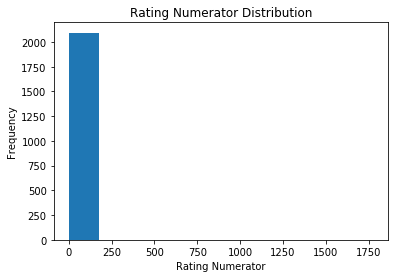

In [66]:
# plot rating_numerator
plt.hist(df.rating_numerator)
# set the title and labels for our plot
plt.title('Rating Numerator Distribution')
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')

# save the plot
plot = plt.gcf()
plot.savefig('rating_numerator_1.png');

The distribution is not clear as we have outliers that are very far than the rest of data.
I will replace these outliers with the median.

In [67]:
# find the median of rating_numerator
median = df.rating_numerator.median()

# replace all rating denominator that >20 with the median
for rate in df.rating_numerator:
    if rate > 20:
        df.rating_numerator.replace(rate, median, inplace = True)

# check the value count after replacing outliers
df.rating_numerator.value_counts()

12    486
10    436
11    431
13    287
9     153
8      98
7      52
14     38
5      34
6      32
3      19
4      16
2       9
1       5
0       1
Name: rating_numerator, dtype: int64

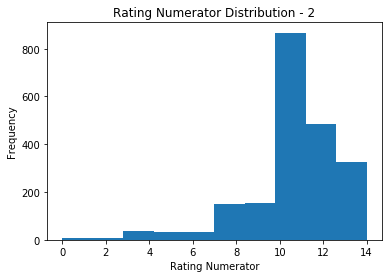

In [68]:
# plot rating_numerator again
plt.hist(df.rating_numerator)
# set the title and labels for our plot
plt.title('Rating Numerator Distribution - 2')
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')

# save the plot
plot = plt.gcf()
plot.savefig('rating_numerator_2.png');

In [69]:
# look at the describtion of retweet_count variable
df.retweet_count.describe()

count     2097.000000
mean      2841.667620
std       4709.238203
min         16.000000
25%        644.000000
50%       1405.000000
75%       3285.000000
max      79515.000000
Name: retweet_count, dtype: float64

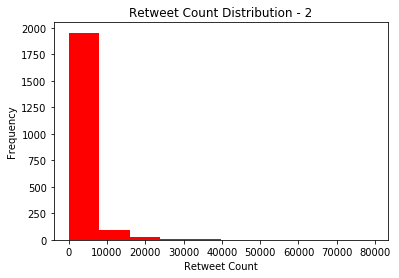

In [70]:
# plot retweet_count
plt.hist(df.retweet_count, color= 'red')
# set the title and labels for our plot
plt.title('Retweet Count Distribution - 2')
plt.xlabel('Retweet Count')
plt.ylabel('Frequency')

# save the plot
plot = plt.gcf()
plot.savefig('retweet_count_1.png');

And we are facing the same problem again, outliers are making it hard to see the distribution, as in the discribtion 75% of our data are falling under 3285 and below, However I will check how many observations are above 20000.

In [71]:
# check how many observations are above 20000.
df[df.retweet_count > 20000]

tweet_id            timestamp  \
38    884247878851493888  2017-07-10 03:08:17   
60    879415818425184262  2017-06-26 19:07:24   
99    870374049280663552  2017-06-01 20:18:38   
115   866450705531457537  2017-05-22 00:28:40   
130   862096992088072192  2017-05-10 00:08:34   
141   859196978902773760  2017-05-02 00:04:57   
325   822872901745569793  2017-01-21 18:26:02   
349   819006400881917954  2017-01-11 02:21:57   
350   819004803107983360  2017-01-11 02:15:36   
357   817827839487737858  2017-01-07 20:18:46   
415   808344865868283904  2016-12-12 16:16:49   
419   807106840509214720  2016-12-09 06:17:20   
421   806629075125202948  2016-12-07 22:38:52   
472   795464331001561088  2016-11-07 03:14:10   
499   791774931465953280  2016-10-27 22:53:48   
672   761672994376806400  2016-08-05 21:19:27   
733   753039830821511168  2016-07-13 01:34:21   
825   744234799360020481  2016-06-18 18:26:18   
862   739544079319588864  2016-06-05 19:47:03   
864   739238157791694849  2016-06-04 23:31:25   
1028  711694788429553666  2016-03-20 23:23:54   
1391  684830982659280897  2016-01-06 20:16:44   
1504  679462823135686656  2015-12-23 00:45:35   
1528  678399652199309312  2015-12-20 02:20:55   
1590  676219687039057920  2015-12-14 01:58:31   

                                                 source  \
38    <a href="http://twitter.com/download/iphone" r...   
60    <a href="http://twitter.com/download/iphone" r...   
99    <a href="http://twitter.com/download/iphone" r...   
115   <a href="http://twitter.com/download/iphone" r...   
130   <a href="http://twitter.com/download/iphone" r...   
141   <a href="http://twitter.com/download/iphone" r...   
325   <a href="http://twitter.com/download/iphone" r...   
349   <a href="http://twitter.com/download/iphone" r...   
350   <a href="http://twitter.com/download/iphone" r...   
357   <a href="http://twitter.com/download/iphone" r...   
415   <a href="http://vine.co" rel="nofollow">Vine -...   
419   <a href="http://twitter.com/download/iphone" r...   
421   <a href="http://twitter.com/download/iphone" r...   
472   <a href="http://twitter.com/download/iphone" r...   
499   <a href="http://vine.co" rel="nofollow">Vine -...   
672   <a href="http://twitter.com/download/iphone" r...   
733   <a href="http://vine.co" rel="nofollow">Vine -...   
825   <a href="http://twitter.com/download/iphone" r...   
862   <a href="http://twitter.com/download/iphone" r...   
864   <a href="http://twitter.com/download/iphone" r...   
1028  <a href="http://twitter.com/download/iphone" r...   
1391  <a href="http://vine.co" rel="nofollow">Vine -...   
1504  <a href="http://twitter.com/download/iphone" r...   
1528  <a href="http://twitter.com/download/iphone" r...   
1590  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
38    OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...   
60    This is Duddles. He did an attempt. 13/10 some...   
99    This is Zoey. She really likes the planet. Wou...   
115   This is Jamesy. He gives a kiss to every other...   
130   We only rate dogs. Please don't send perfectly...   
141   We only rate dogs. This is quite clearly a smo...   
325   Here's a super supportive puppo participating ...   
349   This is Sunny. She was also a very good First ...   
350   This is Bo. He was a very good First Doggo. 14...   
357   This is Buddy. He ran into a glass door once. ...   
415   This is Seamus. He's very bad at entering pool...   
419   This is Stephan. He just wants to help. 13/10 ...   
421   "Good afternoon class today we're going to lea...   
472   Elder doggo does a splash. Both 13/10 incredib...   
499   Vine will be deeply missed. This was by far my...   
672   Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...   
733   So this just changed my life. 13/10 please enj...   
825   Here's a doggo realizing you can stand in a po...   
862   This... is a Tyrannosaurus rex. We only rate d...   
864   Here's a doggo blowi

25 observations are having retweet count bigger than 20000, so we will exclude these observation from the plot to better distribution visulization.

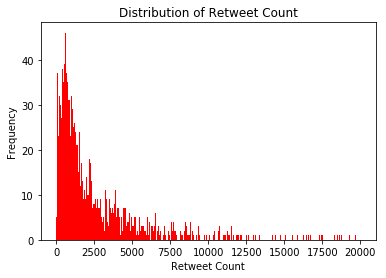

In [72]:
# plot retweet_count again changing the limits and bin size
plt.hist(df.retweet_count, bins=np.linspace(0,20000, 500), color= 'red')
# set the title and labels
plt.title('Distribution of Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Frequency')

# save the plot
plot = plt.gcf()
plot.savefig('retweet_count_2.png');

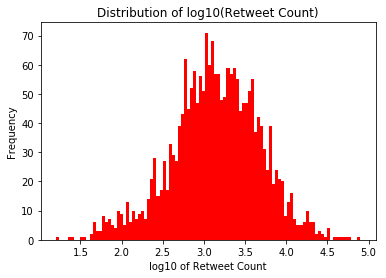

In [73]:
# try numpy log 10 to get normal distribution of retweet_count
log_retweet_count = df['retweet_count'].apply(lambda x: np.log10(x))
plt.hist(log_retweet_count, bins=100, color='red')
# set title and labels
plt.title('Distribution of log10(Retweet Count)')
plt.xlabel('log10 of Retweet Count')
plt.ylabel('Frequency')

# save the plot
plot = plt.gcf()
plot.savefig('retweet_count_3.png');

In [74]:
# check favorite_count discribtion
df.favorite_count.describe()

count      2097.000000
mean       8980.902241
std       12199.636684
min          81.000000
25%        2046.000000
50%        4196.000000
75%       11416.000000
max      132810.000000
Name: favorite_count, dtype: float64

In [75]:
# check how many observations are above 40000 (looking for outliers)
df[df.favorite_count > 45000]

tweet_id            timestamp  \
7     890729181411237888  2017-07-28 00:22:40   
21    887517139158093824  2017-07-19 03:39:09   
22    887473957103951883  2017-07-19 00:47:34   
34    884925521741709313  2017-07-12 00:01:00   
38    884247878851493888  2017-07-10 03:08:17   
41    883482846933004288  2017-07-08 00:28:19   
47    882268110199369728  2017-07-04 16:01:23   
50    881666595344535552  2017-07-03 00:11:11   
51    881536004380872706  2017-07-02 15:32:16   
60    879415818425184262  2017-06-26 19:07:24   
68    877736472329191424  2017-06-22 03:54:17   
99    870374049280663552  2017-06-01 20:18:38   
106   868880397819494401  2017-05-28 17:23:24   
115   866450705531457537  2017-05-22 00:28:40   
116   866334964761202691  2017-05-21 16:48:45   
130   862096992088072192  2017-05-10 00:08:34   
141   859196978902773760  2017-05-02 00:04:57   
154   855851453814013952  2017-04-22 18:31:02   
192   846514051647705089  2017-03-28 00:07:32   
279   830583320585068544  2017-02-12 01:04:29   
286   829011960981237760  2017-02-07 17:00:28   
312   825535076884762624  2017-01-29 02:44:34   
325   822872901745569793  2017-01-21 18:26:02   
349   819006400881917954  2017-01-11 02:21:57   
350   819004803107983360  2017-01-11 02:15:36   
357   817827839487737858  2017-01-07 20:18:46   
415   808344865868283904  2016-12-12 16:16:49   
419   807106840509214720  2016-12-09 06:17:20   
421   806629075125202948  2016-12-07 22:38:52   
432   804026241225523202  2016-11-30 18:16:08   
472   795464331001561088  2016-11-07 03:14:10   
672   761672994376806400  2016-08-05 21:19:27   
825   744234799360020481  2016-06-18 18:26:18   
864   739238157791694849  2016-06-04 23:31:25   
1528  678399652199309312  2015-12-20 02:20:55   
1590  676219687039057920  2015-12-14 01:58:31   
2035  667152164079423490  2015-11-19 01:27:25   

                                                 source  \
7     <a href="http://twitter.com/download/iphone" r...   
21    <a href="http://twitter.com/download/iphone" r...   
22    <a href="http://twitter.com/download/iphone" r...   
34    <a href="http://twitter.com/download/iphone" r...   
38    <a href="http://twitter.com/download/iphone" r...   
41    <a href="http://twitter.com/download/iphone" r...   
47    <a href="http://twitter.com/download/iphone" r...   
50    <a href="http://twitter.com/download/iphone" r...   
51    <a href="http://twitter.com/download/iphone" r...   
60    <a href="http://twitter.com/download/iphone" r...   
68    <a href="http://twitter.com/download/iphone" r...   
99    <a href="http://twitter.com/download/iphone" r...   
106   <a href="http://twitter.com/download/iphone" r...   
115   <a href="http://twitter.com/download/iphone" r...   
116   <a href="http://twitter.com/download/iphone" r...   
130   <a href="http://twitter.com/download/iphone" r...   
141   <a href="http://twitter.com/download/iphone" r...   
154   <a href="http://twitter.com/download/iphone" r...   
192   <a href="http://twitter.com/download/iphone" r...   
279   <a href="http://twitter.com/download/iphone" r...   
286   <a href="http://twitter.com/download/iphone" r...   
312   <a href="http://twitter.com/download/iphone" r...   
325   <a href="http://twitter.com/download/iphone" r...   
349   <a href="http://twitter.com/download/iphone" r...   
350   <a href="http://twitter.com/download/iphone" r...   
357   <a href="http://twitter.com/download/iphone" r...   
415   <a href="http://vine.co" rel="nofollow">Vine -...   
419   <a href="http://twitter.com/download/iphone" r...   
421   <a href="http://twitter.com/download/iphone" r...   
432   <a href="http://twitter.com/download/iphone" r...   
472   <a href="http://twitter.com/download/iphone" r...   
672   <a href="http://twitter.com/download/iphone" r...   
825   <a href="http://twitter.com/download/iphone" r...   
864   <a href="http://twitter.com/download/iphone" r...   
1528  <a href="http://twitter.com/download/iphone" r...   
1590  <a href="http://twitter

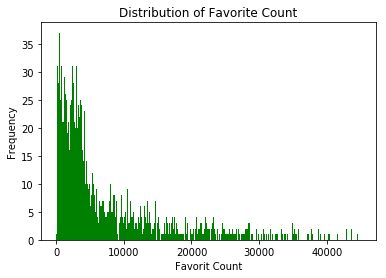

In [76]:
# plot favorite_count that are 45000 or less
plt.hist(df.favorite_count, bins=np.linspace(0,45000, 500), color='green')
# set the title and labels
plt.title('Distribution of Favorite Count')
plt.xlabel('Favorit Count')
plt.ylabel('Frequency')

# save the plot
plot = plt.gcf()
plot.savefig('favorite_count_1.png');

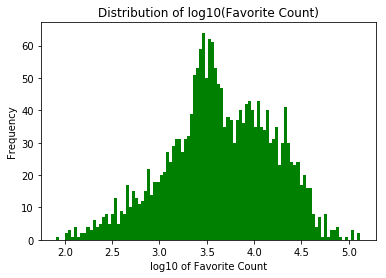

In [77]:
# try numpy log 10 to get normal distribution of favorite_count
log_favorite_count = df['favorite_count'].apply(lambda x: np.log10(x))
plt.hist(log_favorite_count, bins=100, color='green')
# set title and labels
plt.title('Distribution of log10(Favorite Count)')
plt.xlabel('log10 of Favorite Count')
plt.ylabel('Frequency')

# save the plot
plot = plt.gcf()
plot.savefig('favorite_count_2.png');

### Now let's look at the relationship between the variables

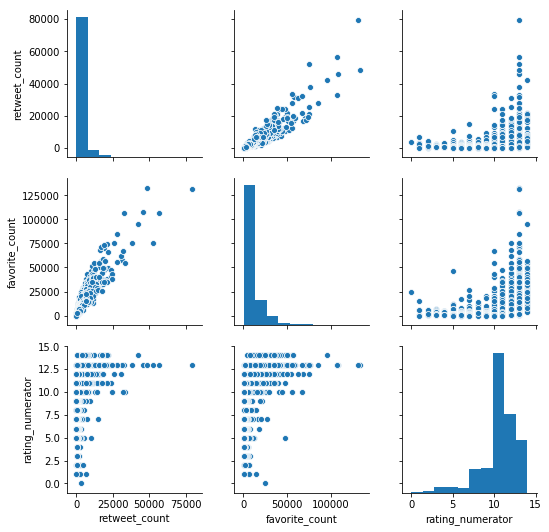

In [78]:
# use seaborn pairplot function to pair variables
sb.pairplot(df[['retweet_count', 'favorite_count', 'rating_numerator']]);

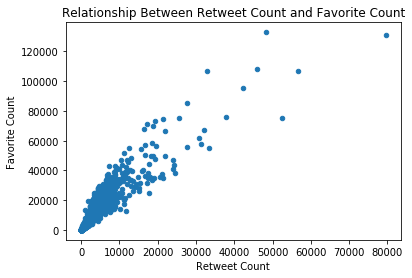

In [79]:
# use scatter plot to see the relationship between retweet_count and favorit_count
df.plot(x='retweet_count', y='favorite_count', kind='scatter')
# set title and labels
plt.title('Relationship Between Retweet Count and Favorite Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')

# save the plot
plot = plt.gcf()
plot.savefig('relationship_1.png');

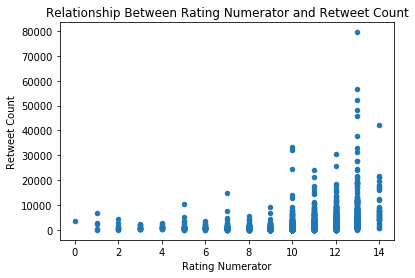

In [80]:
# use scatter plot to see the relationship between rating_numerator and retweet_count
df.plot(x='rating_numerator', y='retweet_count', kind='scatter')
# set title and labels
plt.title('Relationship Between Rating Numerator and Retweet Count')
plt.xlabel('Rating Numerator')
plt.ylabel('Retweet Count')

# save the plot
plot = plt.gcf()
plot.savefig('relationship_2.png');

## Conclusion:

- There is a positive relationship between the three variables (rating_numerator, retweet_count, and favorite_count).
- A very strong relationship is shown between retweet_count and favorite_count and this is logical as more people will see the tweet if someone retweet it and this will let more people make it as favorite.
- People tend to retweet tweets with high rating numerator more than tweets with low rating numerator.